Total Sales (after returns): $11,823,481.53


<ipython-input-7-21973f92633c>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])


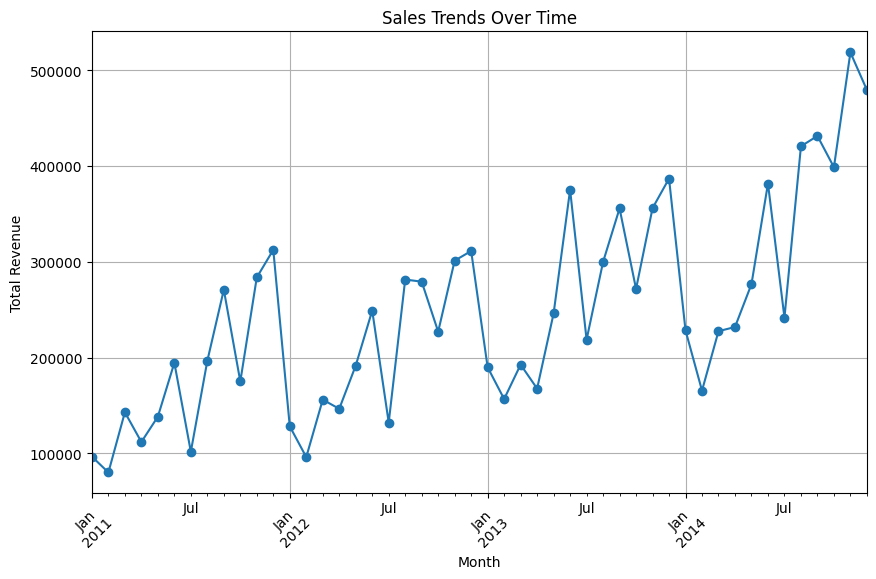

<ipython-input-7-21973f92633c>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.head(top_n).values, y=product_sales.head(top_n).index, palette='viridis')


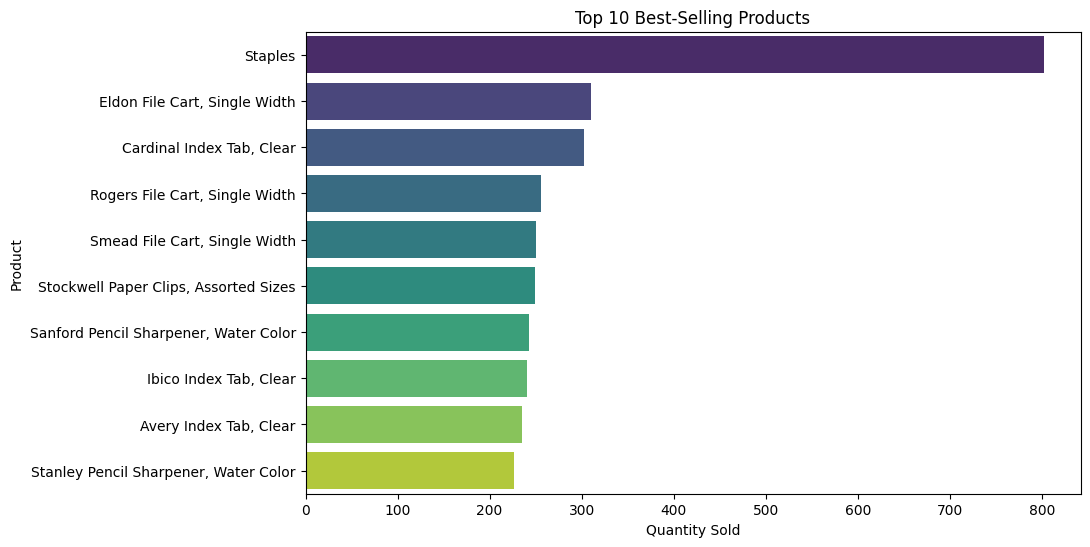

Product Name
Staples                                  802
Eldon File Cart, Single Width            310
Cardinal Index Tab, Clear                303
Rogers File Cart, Single Width           256
Smead File Cart, Single Width            250
Stockwell Paper Clips, Assorted Sizes    249
Sanford Pencil Sharpener, Water Color    243
Ibico Index Tab, Clear                   241
Avery Index Tab, Clear                   235
Stanley Pencil Sharpener, Water Color    227
Name: Quantity, dtype: int64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sales data from both sheets
def load_data(file_path):
    # Load both sheets: 'Orders' and 'Returned'
    df_orders = pd.read_excel(file_path, sheet_name='Orders')  # Main sales data
    df_returned = pd.read_excel(file_path, sheet_name='Returns')  # Returned orders

    return df_orders, df_returned

# Remove returned orders from the dataset
def filter_returned_orders(df_orders, df_returned):
    # Filter out orders that are in the returned sheet
    filtered_orders = df_orders[~df_orders['Order ID'].isin(df_returned['Order ID'])]
    return filtered_orders

# Calculate total sales
def calculate_total_sales(df):
    total_sales = df['Sales'].sum()
    print(f"Total Sales (after returns): ${total_sales:,.2f}")
    return total_sales

# Analyze sales trends over time
def analyze_sales_trends(df):
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    sales_trends = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

    plt.figure(figsize=(10, 6))
    sales_trends.plot(kind='line', marker='o', title='Sales Trends Over Time', xlabel='Month', ylabel='Total Revenue')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

# Determine best-selling products
def best_selling_products(df, top_n=10):
    product_sales = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=product_sales.head(top_n).values, y=product_sales.head(top_n).index, palette='viridis')
    plt.title(f'Top {top_n} Best-Selling Products')
    plt.xlabel('Quantity Sold')
    plt.ylabel('Product')
    plt.show()

    print(product_sales.head(top_n))
    return product_sales

# Main function to run the analysis
def main(file_path):
    # Load the data
    df_orders, df_returned = load_data(file_path)

    # Filter out returned orders
    df_filtered = filter_returned_orders(df_orders, df_returned)

    # Calculate total sales
    calculate_total_sales(df_filtered)

    # Analyze sales trends over time
    analyze_sales_trends(df_filtered)

    # Determine the best-selling products
    best_selling_products(df_filtered)

if __name__ == "__main__":
    # Update this with your file path
    main('/content/ECOMM DATA.xlsx')
